In [2]:
import gzip
import random
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt 
from collections import defaultdict

In [3]:
def readGz(f):
    for l in gzip.open(f):
        yield eval(l)

In [186]:
####
#### QUESTION 1 START
####

In [5]:
# now we split the data by the following rules:
# Reviews 1-100,000 for training
# Reviews 100,001-200,000 for validation
# f = readGz("/Users/linbinyang/Desktop/course-fall2018/cse258/data/assignment1/train.json.gz")
training_set = []
validation_set = []
user_item_pair = set()
all_set = []
i = 1
for elem in readGz("/Users/linbinyang/Desktop/course-fall2018/cse258/data/assignment1/train.json.gz"):
    if i <= 100000:
        training_set.append(elem)
        i = i + 1
    elif i <= 200000:
        validation_set.append(elem)
        i = i + 1
    user_item_pair.add(elem['reviewerID']+"-"+elem['itemID'])
    all_set.append(elem)

In [69]:
# random sample data from validation set
# note that we have already build one set to store all positive case
# For each user we have a unique reviewer ID
# For Item we also have one unique Item ID
# We construct non-purchased pair

In [152]:
non_purchase_user_item = set()
while 1:
    # Random sample in the 100000 dataset
    unit = ""
    rid_1 = random.randint(0,99999)
    unit = unit+validation_set[rid_1]['reviewerID']+"-"
    rid_2 = random.randint(0,99999)
    unit = unit + validation_set[rid_2]['itemID']
    if unit not in user_item_pair:
        non_purchase_user_item.add(unit)
    if len(non_purchase_user_item) == 100000:
        break

In [153]:
# Evaludate the accuracy of baseline model on my validation set
# for the 0-99999 data label = 1 and 100000-19999 data label = 0
f = open("validation_data.txt","w")
for i in range(len(validation_set)):
    f.write(validation_set[i]['reviewerID']+"-"+validation_set[i]['itemID']+"-"+"1"+"\n")
    # f.write(non_purchase_user_item[i]+"-"+"0"+"/n")
f.close()

In [154]:
f = open("validation_data.txt","a")
for elem in non_purchase_user_item:
    f.write(elem+"-"+"0"+"\n")
f.close()
# Ok, here we finish the build of our validation data set

In [166]:
# We adopt the baseline for would purchase
businessCount = defaultdict(int)
totalPurchases  = 0
for elem in training_set:
    user, business = elem['reviewerID'], elem['itemID']
    businessCount[business] += 1
    totalPurchases += 1

mostPopular = [(businessCount[x], x) for x in businessCount]
# key: num
# value: item
mostPopular.sort()
mostPopular.reverse()
# compute the threashold for the baseline model
# 1 2 3 4 5 6
if len(mostPopular) % 2 == 0:
    threashold = (mostPopular[int(len(mostPopular)/2-1)][0] + mostPopular[int(len(mostPopular)/2)][0])/2
else:
    threashold = mostPopular[int(len(mostPopular)/2)][0]

return1 = set()
count = 0
for ic, i in mostPopular:
    if ic >= threashold:
        return1.add(i)

# Now in the return1, we have the most popular item
acc_num = 0
for l in open("validation_data.txt"):
    u,i,label = l.strip().split('-')
    if i in return1 and label == "1":
        acc_num += 1
    if i not in return1 and label == "0":
        acc_num += 1
acc = acc_num/200000
print (acc)

0.49915


In [203]:
####
#### QUESTION 1 END
####

In [202]:
####
#### QUESTION 2 START
####

In [14]:
# I do not think this would be a good model, because during the process of building the validation data, 
# if we happend to sample those Item that is popular, then the FP rate would increase

In [201]:
####
#### QUESTION 2 END
####

In [200]:
####
#### QUESTION 3 START
####

In [207]:
# for this question, I have two defaultdict(set): user and item
# user stores all the categories user_i have bought and the format is set(tuple), same for item
# when make decision in the validation set, we use & to check if user_i buys this thing or not

In [141]:
# baseline model for question 3
# Build categories for question 3
# collect all categories from the 200,000 data
user_default_cateset = defaultdict(set)
item_default_cateset = defaultdict(set)
for elem in readGz("/Users/linbinyang/Desktop/course-fall2018/cse258/data/assignment1/train.json.gz"):
    # Here elem denotes one line of record
    categories_list = elem['categories']
    for eachcate in categories_list:
        user_default_cateset[elem['reviewerID']].add(tuple(eachcate))
        item_default_cateset[elem['itemID']].add(tuple(eachcate))

In [144]:
# Ok now we implement our model to the validation set
# pairs Purchase.txt
f = open("buyornot.txt","w")
f_in = open("/Users/linbinyang/Downloads/assignment1/pairs_Purchase.txt")
index = 0
while 1:
    line = f_in.readline().strip()
    if not line:
        break
    if index == 0:
        index = index + 1
        f.write(line+'\n')
    else:
        u = line.split('-')[0]
        i = line.split('-')[1]
        if u not in user_default_cateset:
            f.write(u + '-' + i + ',' + str(0) + '\n')
        elif len(user_default_cateset[u] & item_default_cateset[i]) == 0:
            f.write(u + '-' + i + ',' + str(0) + '\n')
        elif len(user_default_cateset[u] & item_default_cateset[i]) != 0:
            f.write(u + '-' + i + ',' + str(1) + '\n')
f.close()
f_in.close()

In [199]:
####
#### QUESTION 3 END
####

In [196]:
####
#### QUESTION 4 START
####

In [197]:
# My username on kaggle is 
# linbinisme
# my score is top 35% and is around 0.63549

In [198]:
####
#### QUESTION 4 END
####

In [195]:
####
#### QUESTION 5 START
####

In [170]:
# trival model on train_data
# the alpha is just the average of all ratings
alpha = 0
for elem in training_set:
    alpha = alpha + elem['rating']
alpha = alpha/len(training_set)
print(f"alpha is {alpha}")

alpha is 4.232


In [174]:
# Use MSE to measure the performance
MSE_trival = sum([(elem['rating']-alpha)**2 for elem in validation_set])/len(validation_set)
print (f"MSE_trival is {MSE_trival}")

MSE_trival is 1.222481119999121


In [194]:
####
#### QUESTION 5 END
####

In [193]:
####
#### QUESTION 6 START
####

In [6]:
# For this question, we use naive bayes model
user = defaultdict(list)
item = defaultdict(list)
U_I_R = []
for elem in all_set:
    unit = []
    item_R = []
    user_R = []
    unit.append(elem['reviewerID'])
    user_R.append(elem['reviewerID'])
    unit.append(elem['itemID'])
    item_R.append(elem['itemID'])
    unit.append(elem['rating'])
    user_R.append(elem['rating'])
    item_R.append(elem['rating'])
    U_I_R.append(unit)
    user[elem['reviewerID']].append(item_R)
    item[elem['itemID']].append(user_R)

In [7]:
def inner_multiply(x, y):
    return sum([x[i]*y[i] for i in range(len(x))])

In [32]:
def ObjectFunction(alpha, beta_u, beta_i, lam_u, lam_i, U_I_R, user, item):
    res = 0
    for elem in U_I_R:
        res = res + (alpha + beta_u[elem[0]] + beta_i[elem[1]] - elem[2])**2
    for elem in user:
        res = res + lam_u*beta_u[elem] * beta_u[elem]
    for elem in item:
        res = res + lam_i*beta_i[elem] * beta_i[elem]
    return res

In [31]:
def ObjectPrime(alpha, beta_u, beta_i, lam_u, lam_i, U_I_R, user, item):
    res = []
    new_alpha = 0
    for elem in U_I_R:
        new_alpha = new_alpha + elem[2] - beta_u[elem[0]] - beta_i[elem[1]]
    new_alpha = new_alpha/len(U_I_R)
    for key_u in beta_u:
        # for each user there is one corresponding beta_u_value
        temp_u = 0
        goal_item = user[key_u]
        for elem in goal_item:
            temp_u = temp_u + elem[1] - alpha - beta_i[elem[0]]
        beta_u[key_u] = temp_u/(lam_u+len(goal_item))
    for key_i in beta_i:
        # for each item there is one corresponding beta_i value
        temp_i = 0
        goal_user = item[key_i]
        for elem in goal_user:
            temp_i = temp_i + elem[1] - alpha - beta_u[elem[0]]
        beta_i[key_i] = temp_i/(lam_i+len(goal_user))
    res.append(new_alpha)
    res.append(beta_u)
    res.append(beta_i)
    return res

In [48]:
# Initial beta_u and beta_i
beta_u = defaultdict(int)
beta_i = defaultdict(int)
alpha = 0
for key_u in user:
    beta_u[key_u] = 0
for key_i in item:
    beta_i[key_i] = 0

In [35]:
# begin training
def train(num_iter, alpha, beta_u, beta_i, lam_u, lam_i, U_I_R, user, item):
    coff = []
    res = []
    coff.append(alpha)
    coff.append(beta_u)
    coff.append(beta_i)
    for i in range(num_iter):
        result = ObjectFunction(coff[0], coff[1], coff[2], lam_u, lam_i, U_I_R, user, item)
        if i % 10 == 0:
            print (result)
        res.append(result)
        coff = ObjectPrime(coff[0], coff[1], coff[2], lam_u, lam_i, U_I_R, user, item)
    plt.title("Rating Prediction Error")
    plt.xlabel("Number of Samples")
    plt.ylabel("Error")
    plt.plot(range(1, len(res)+1, 1), res, color='blue')
    plt.show()
    return coff

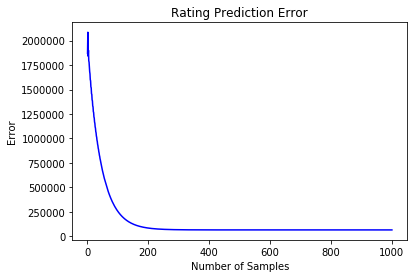

In [41]:
num_iter = 1000
lam = 1.0
coff = train(num_iter, alpha, beta_u, beta_i, lam, U_I_R, user, item)

In [56]:
# Compute the MSE on validation set
def computeMSE(coff, validation_set):
    res = []
    real_label = []
    for elem in validation_set:
        if elem['reviewerID'] in coff[1] and elem['itemID'] in coff[2]:
            res.append(coff[0] + coff[1][elem['reviewerID']] + coff[2][elem['itemID']])
            real_label.append(elem['rating'])
    return sum([abs(res[i] - real_label[i])**2 for i in range(len(res))])/len(res)

In [57]:
print (computeMSE(coff, validation_set))

1.2832276659700115


In [191]:
####
#### QUESTION 6 END
####

In [192]:
####
#### QUESTION 7 START
####

In [107]:
print (max(zip(coff[1].values(),coff[1].keys())))

(1.4867301922953697, 'U495776285')


In [117]:
print (max(zip(coff[2].values(),coff[2].keys())))

(1.2700123170076554, 'I809804570')


In [190]:
####
#### QUESTION 7 END
####

In [189]:
####
#### QUESTION 8 START
####

In [183]:
# choosing best lamda
lam_list = np.linspace(0,10,10)
iter_num = 50
for i in range(len(lam_list)):
    beta_u = defaultdict(int)
    beta_i = defaultdict(int)
    alpha = 0
    for key_u in user:
        beta_u[key_u] = 0
    for key_i in item:
        beta_i[key_i] = 0
    new_coff = train(iter_num, alpha, beta_u, beta_i, lam_list[i], U_I_R, user, item)
    print (lam_list[i])
    print(computeMSE(new_coff, validation_set))

0.0
19.952096728038317
1.1111111111111112
5.489483965611788
2.2222222222222223
1.4792834598885882
3.3333333333333335
1.1644679059244307
4.444444444444445
1.1375532591378357
5.555555555555555
1.1325739731135376
6.666666666666667
1.131705229362933
7.777777777777779
1.1324915009258472
8.88888888888889
1.1340865778358158
10.0
1.1360815721252757


3831692.0
1983989.3434050293
1027593.7603599572
581415.8473325624
369338.7284721533
267999.68378955533
219495.51548346278
196265.97847579635
185138.285321811
179807.23148145402
177253.12072667445
176029.42178968686
175443.13102827314
175162.23013964697
175027.64600072958
174963.16452637292
174932.27038171835
174917.46848214613
174910.3766449323
174906.9788272362


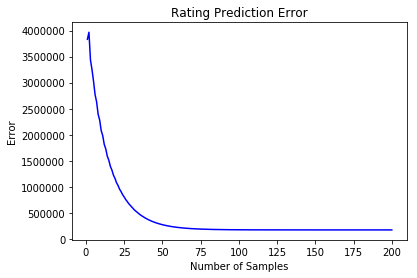

In [49]:
# base on the result shown above, I decide to use lamda = 6.5
# so here we retrain our model
num_iter = 200
lam_u = 3.0
lam_i = 5.0
coff = train(num_iter, alpha, beta_u, beta_i, lam_u, lam_i, U_I_R, user, item)

In [50]:
predictions = open("predictions_Rating12.txt", 'w')
for l in open("/Users/linbinyang/Downloads/assignment1/pairs_Rating.txt"):
    if l.startswith("reviewerID"):
        predictions.write(l)
        continue
    u,i = l.strip().split('-')
    predictions_n = coff[0] + coff[1][u] + coff[2][i]
    if predictions_n > 5:
        predictions.write(u + '-' + i + ',' + str(5) + '\n')
    else:
        predictions.write(u + '-' + i + ',' + str(predictions_n) + '\n')
predictions.close()

In [204]:
# My kaggle performance is 1.18465 and ranked top 59%
# My kaggle username is linbinisme

In [188]:
####
#### QUESTION 8 END
####